# Keras 101: Designing your Neural Network - How Many Hidden Layers?

Hopefully you will have followed our walkthrough of how adding more linear layers to our network changes the complexity of the decicion boundaries that can be drawn by a neural network fro simple classification.

Where we stared with the simpliest componant of the neural network a neuron and saw how this describes a linear classifier. We then saw that a single hidden layer with an arbitary number of neurons can be used to generate any decision boundary that can be described with a single mapping of one space onto another.

You

We then saw how adding multiple nurons to a single hidden layer results in a decision boundary that is the sum of multiple linear boundaries passed through a output neuron for normalisation. Thus allowing for a represention of any single function that maps one finite space onto another. 

Very rare to need more than one hidden layer.

In [15]:
import keras
from sklearn.datasets import make_moons, make_circles
import matplotlib.pyplot as plt
import numpy as np

(300, 2)
(1200,)


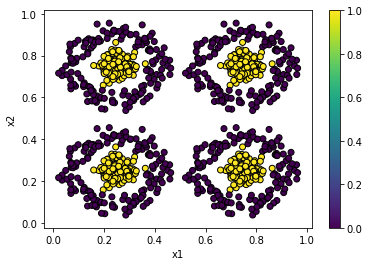

In [22]:
dataset_circle = make_circles(n_samples=300,noise=0.15,factor=0.2, random_state=1)

features_circle = dataset_circle[0]
labels_circle = dataset_circle[1]
labels_circle1 =labels_circle.copy()

features_circle[:,0] = (features_circle[:,0]+1.5)/6.0
features_circle[:,1] = (features_circle[:,1]+1.5)/6.0

features_circle2 = features_circle.copy()
features_circle2[:,0] = features_circle[:,0]+0.5

features_circle3 = features_circle.copy()
features_circle3[:,1] = features_circle[:,1]+0.5

features_circle4 = features_circle.copy()
features_circle4[:,1] = features_circle[:,1]+0.5
features_circle4[:,0] = features_circle[:,0]+0.5



print(features_circle.shape)
features_circle = np.append(features_circle,features_circle2, axis=0)
labels_circle = np.append(labels_circle,labels_circle1, axis=0)
features_circle = np.append(features_circle,features_circle3, axis=0)
labels_circle = np.append(labels_circle,labels_circle1, axis=0)
features_circle = np.append(features_circle,features_circle4, axis=0)
labels_circle = np.append(labels_circle,labels_circle1, axis=0)
print(labels_circle.shape)

x1_min = np.amin(features_circle[:,0])
x1_max = np.amax(features_circle[:,0])
x2_min = np.amin(features_circle[:,1])
x2_max = np.amax(features_circle[:,1])

plt.scatter(features_circle[:,0],features_circle[:,1],edgecolor="black",linewidth=1,c=labels_circle)
plt.xlabel("x1")
plt.ylabel("x2")
plt.colorbar()
plt.show()

We will now explore the effect of adding more hidden layers to our neural network.

As just described a single hidden layer feeding into a neuron is able to represent any single function that maps one finite space onto another resulting in a nonlinear representation of the dataset. Thus adding a second hidden layer results in an array of nonlinear represnetations of the data. 

Thus the network can represent an arbitrary decision boundary to arbitrary accuracy and can approximate any smooth mapping to any accuracy.

In [35]:
layers = []
layers.append(keras.layers.Dense(3, input_dim = 2, activation="tanh"))
layers.append(keras.layers.Dense(4, activation="tanh"))
layers.append(keras.layers.Dense(1, activation="sigmoid"))

model = keras.Sequential(layers)

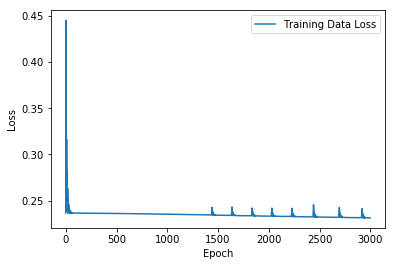

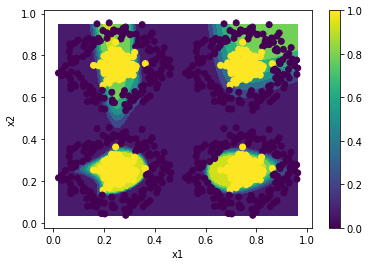

In [39]:
model.compile(optimizer=keras.optimizers.Adam(lr=0.03), loss='binary_crossentropy', metrics=['binary_accuracy', 'categorical_accuracy'])

history = model.fit(features_circle, labels_circle, batch_size=features_circle.shape[0],epochs=3000, verbose=0)

loss = history.history['loss']
epoch = np.arange(0, len(loss))

plt.plot(epoch,loss, label='Training Data Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()
xx, yy = np.meshgrid(np.arange(x1_min,x1_max,0.01),np.arange(x2_min,x2_max,0.01))

z = model.predict(np.c_[xx.ravel(),yy.ravel()])
z = z.reshape(xx.shape)

plt.contourf(xx,yy,z)
plt.scatter(features_circle[:,0],features_circle[:,1],c= labels_circle)
plt.xlabel('x1')
plt.ylabel('x2')
plt.colorbar()
plt.show()